# What do we need to get hired at Google?

#### *Adrian R Angkawijaya*
#### *July 2018*

## *Introduction*

This is an Exploratory Data Analysis of the Google Company's job requirements. The data was made publicly in Kaggle and is available to access by clicking [here](https://www.kaggle.com/niyamatalmass/google-job-skills). 

The dataset contains the following variables:

- **Company** - Name of the Company
- **Title** - Title of the job
- **Category** - Job Category
- **Location** - Location of the Company
- **Responsibilities** - The responsibility for the job 
- **Minimum Qualifications** - Minimum requirements to get the job
- **Preferred Qualifications** - Preferable requirements to get the job

**Note:** In addition to the analysis of general Google jobs, I also explored the jobs that are specifically related to data or analytics field for personal purposes. 

Do you think you have all the requirements to work at Google? Let's find out!

**First import the libraries:**

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

**Load the data file:**

In [2]:
google = pd.read_csv("/Users/adrianromano/Downloads/Kaggle/job_skills.csv")

* ## General Jobs at Google

**See the first few rows of the data:**

In [37]:
pd.set_option('display.max_colwidth', -1)
google.head(3)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country,Min_years_experience,Min_year_category
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expectations and rationale on deliverables for stakeholders and program contributors.\nProvide program performance feedback to teams in Product, Engineering, Sales, and Marketing (among others) to enable efficient cross-team operations.","BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.","Experience in the business technology market as a program manager in SaaS, cloud computing, and/or emerging technologies.\nSignificant cross-functional experience across engineering, sales, and marketing teams in cloud computing or related technical fields.\nProven successful program outcomes from idea to launch in multiple contexts throughout your career.\nAbility to manage the expectations, demands and priorities of multiple internal stakeholders based on overarching vision and success for global team health.\nAbility to work under pressure and possess flexibility with changing needs and direction in a rapidly-growing organization.\nStrong organization and communication skills.",Singapore,3,3 - 5
1,Google,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Shanghai, China","Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational issues with material, process, fixtures, equipment, etc. during the NPI phase to enable delivery of a mature product and manufacturing process into mass production. Support/drive continuous improvement efforts in the supply chain.\nLead suppliers by providing technical direction to establish and validate (utilizing statistical tools) process capability during the NPI phase for consistently delivering a quality product in mass production.\nUtilize DOE’s, FMEA and other Industry standard tools to proactively identify and address risks and optimize process parameters.","BS degree in an Engineering discipline or equivalent practical experience.\n7 years of experience in Cable/Connector Design or Manufacturing in an NPI role.\nExperience working with Interconnect Engineering and Product Design (PD)/Mechanical Engineer in developing, manufacturing and testing.\nAbility to speak and write in English and Mandarin fluently and idiomatically.","BSEE, BSME or BSIE degree.\nExperience of using Statistics tools for Data analysis, e.g. distribution histogram/pareto chart, process control chart, Design of Experiment (DOE), Correlation Analysis, etc.\nDemonstrated knowledge in PCBA manufacturing process and quality control.\nFamilar with cable/connector related components' manufacturing: moldling, stamping, die-casting, LIM, MIM process and materials.\nSelf starter with innovation, integrity and attention to detail.\nAbility to travel up to 50% of the time",China,7,6 - 9
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",T

**Check if there are any missing values:**

In [4]:
google_NA = google.isnull().sum()
google_NA = google_NA.drop(google_NA[google_NA == 0].index).sort_values(ascending = False)

print(google_NA)

Responsibilities            15
Preferred Qualifications    14
Minimum Qualifications      14
dtype: int64


**Delete the rows containing missing values:**

In [5]:
google = google.dropna(how = "any", axis = "rows")

**See what companies are present in the data:**

In [6]:
google.Company.value_counts()

Google     1212
YouTube    23  
Name: Company, dtype: int64

There are 1212 observations for Google and 23 for YouTube. 

**Note:** Even though YouTube is also owned by Google, we drop them since we are only interested in exploring Google data.

**Drop YouTube data rows:**

In [7]:
google = google[google.Company != "YouTube"]

**What are the most on demand Job Title at Google?**

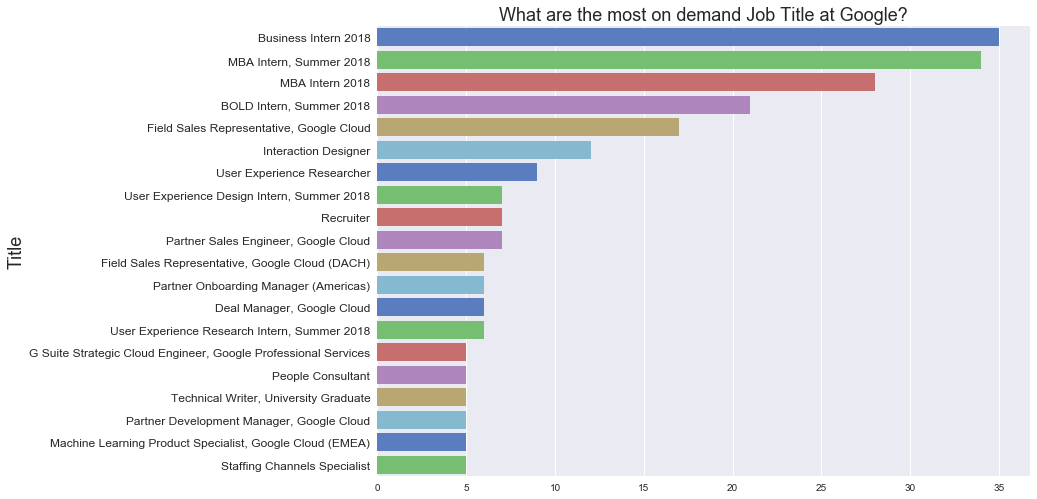

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(y = "Title", data = google, order = pd.value_counts(google['Title']).iloc[:20].index, palette="muted")
plt.title("What are the most on demand Job Title at Google?", fontsize=18)
plt.xlabel("")
plt.ylabel("Title", fontsize = 18)
plt.yticks(fontsize = 12)
plt.show()

* Looks like Google is highly looking for interns specifically in the area of Business and MBA fields.

**What are the most on demand Job Category at Google?**

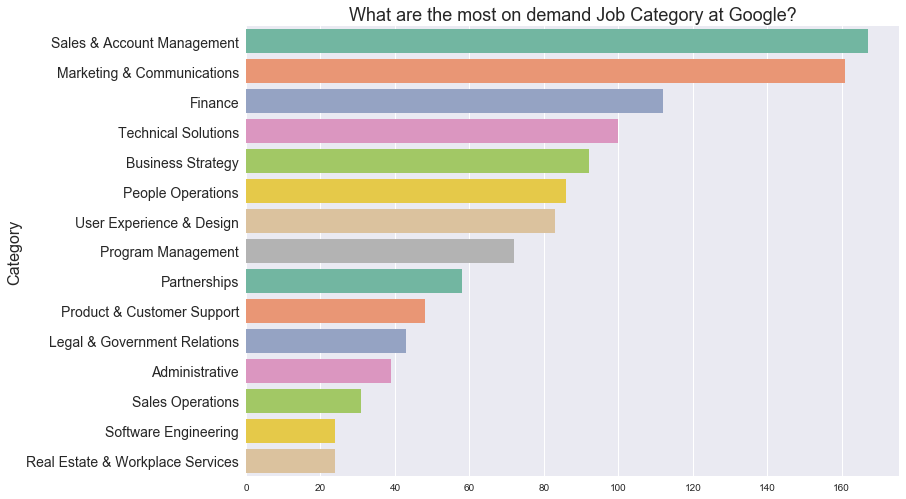

In [9]:
sns.countplot(y = "Category", data = google, order = pd.value_counts(google['Category']).iloc[:15].index, palette = "Set2")
plt.title("What are the most on demand Job Category at Google?", fontsize=18)
plt.xlabel("")
plt.ylabel("Category", fontsize = 16)
plt.yticks(fontsize = 14)
plt.show()

* It is shown that Google is highly looking for Job Category in the area of Sales and account management as well as the Marketing and communications field.

**What are the most common Google Job Locations around the world?**

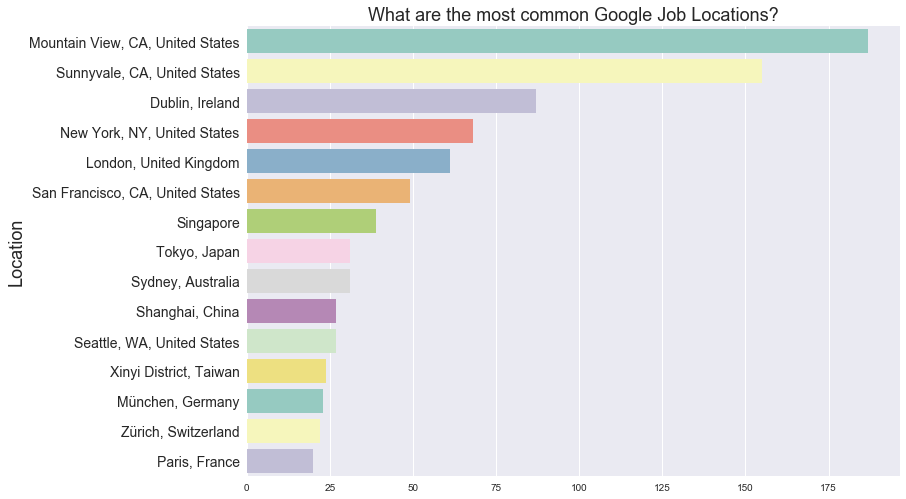

In [10]:
sns.countplot(y = "Location", data = google, order = pd.value_counts(google['Location']).iloc[:15].index, palette = "Set3")
plt.title("What are the most common Google Job Locations?", fontsize=18)
plt.xlabel("")
plt.ylabel("Location", fontsize = 18)
plt.yticks(fontsize = 14)
plt.show()

* Looks like the Google Company in California, specifically Mountain View and Sunnyvale are more highly in need to hire new employees.

**From the location variable, we can extract the country information by splitting the names as follows:**

In [11]:
google["Country"] = google["Location"].apply(lambda x: x.split(",")[-1])

**What are the most common Countries for Google Jobs?**

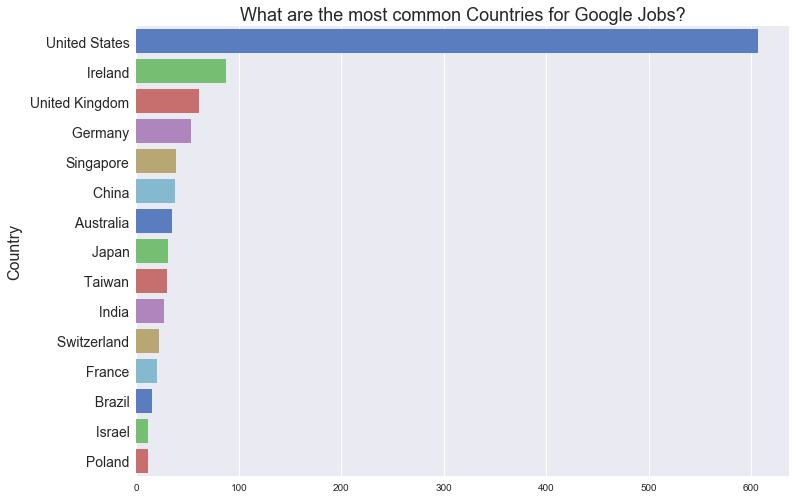

In [12]:
sns.countplot(y = "Country", data = google, order = pd.value_counts(google['Country']).iloc[:15].index, palette = "muted")
plt.title("What are the most common Countries for Google Jobs?", fontsize=18)
plt.xlabel("")
plt.ylabel("Country", fontsize = 16)
plt.yticks(fontsize = 14)
plt.show()

* The Google Companies in the United States are more in need to hire new employees than other countries.

**What Academic Degrees are required for jobs at Google?**

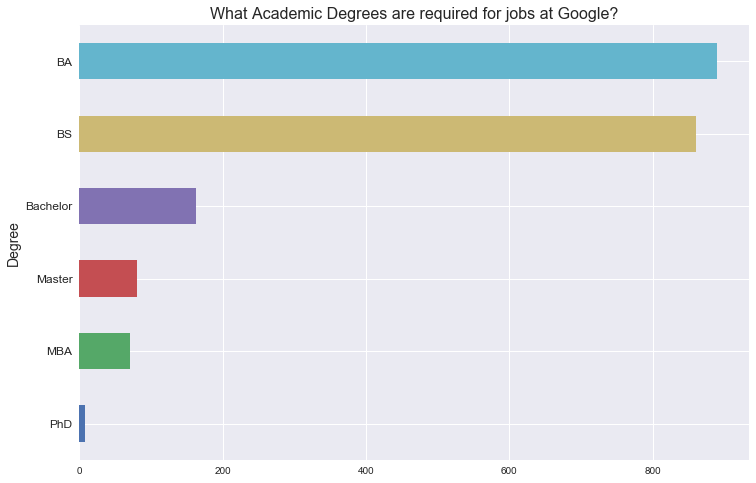

In [39]:
degree = ['BA','BS','Bachelor','MBA','Master','PhD']

degrees = dict((x,0) for x in degree)
for i in degrees:
    x = google['Minimum Qualifications'].str.contains(i).sum()
    if i in degrees:
        degrees[i] = x
        
degree_sort = sorted(degrees.items(), key = lambda x: x[1], reverse = True)
degree_df = pd.DataFrame(degree_sort,columns=['Degree', 'Frequency'])

degree_df = degree_df[::-1]

degree_df.plot.barh(x = 'Degree', y = 'Frequency', figsize=(12,8), legend = False)
plt.title("What Academic Degrees are required for jobs at Google?", fontsize=16)
plt.xlabel("")
plt.ylabel("Degree", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* A minimum degree in BA or BS are highly required to get a job at Google.

**What Academic Degrees are preferred for jobs at Google?**

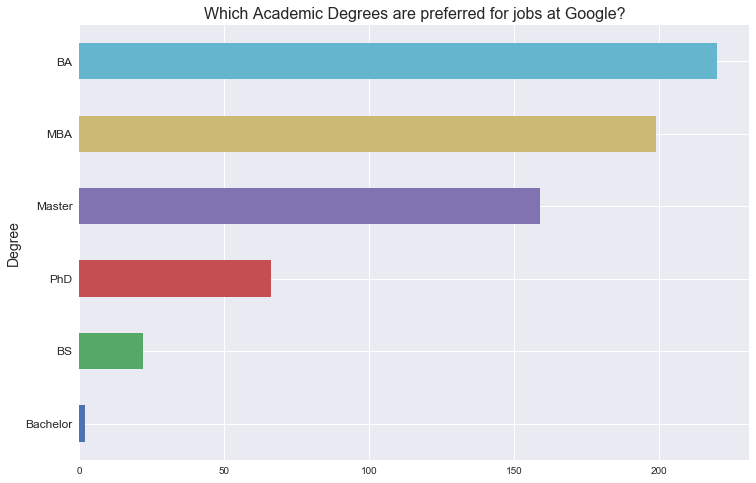

In [14]:
degrees = dict((x,0) for x in degree)
for i in degrees:
    x = google['Preferred Qualifications'].str.contains(i).sum()
    if i in degrees:
        degrees[i] = x
        
degree_sort = sorted(degrees.items(), key = lambda x: x[1], reverse = True)
degree_df = pd.DataFrame(degree_sort,columns=['Degree', 'Frequency'])
degree_df

degree_df = degree_df[::-1]

degree_df.plot.barh(x = 'Degree', y = 'Frequency', figsize=(12,8), legend = False)
plt.title("What Academic Degrees are preferred for jobs at Google?", fontsize=16)
plt.xlabel("")
plt.ylabel("Degree", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* BA still dominates the jobs, but if you have a degree in MBA, Master or PhD you are preferred more to get hired.

**Which Software Tools are required for jobs at Google?**

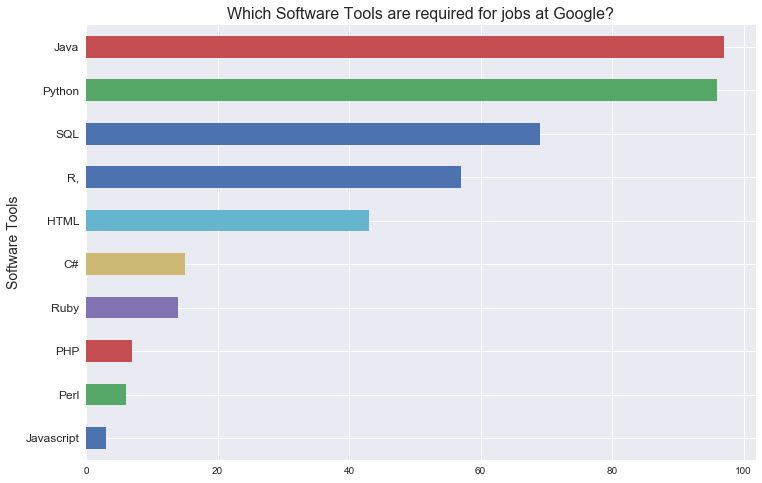

In [15]:
software = ['Python', 'Java', 'PHP', 'Javascript', 'R,', 'Ruby', 'Perl','C#','SQL', 'HTML']

softwares = dict((x,0) for x in software)
for i in softwares:
    x = google['Minimum Qualifications'].str.contains(i).sum()
    if i in softwares:
        softwares[i] = x
        
software_sort = sorted(softwares.items(), key = lambda x: x[1], reverse = True)
software_df = pd.DataFrame(software_sort,columns=['Software', 'Frequency'])

software_df = software_df[::-1]

software_df.plot.barh(x = 'Software', y = 'Frequency', figsize=(12,8), legend = False)
plt.title("Which Software Tools are required for jobs at Google?", fontsize=16)
plt.xlabel("")
plt.ylabel("Software Tools", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* Java and Python programming skills dominate the requirements to be hired at Google.
* SQL and R skills are also quite common.

**Which Software Tools are preferred for jobs at Google?**

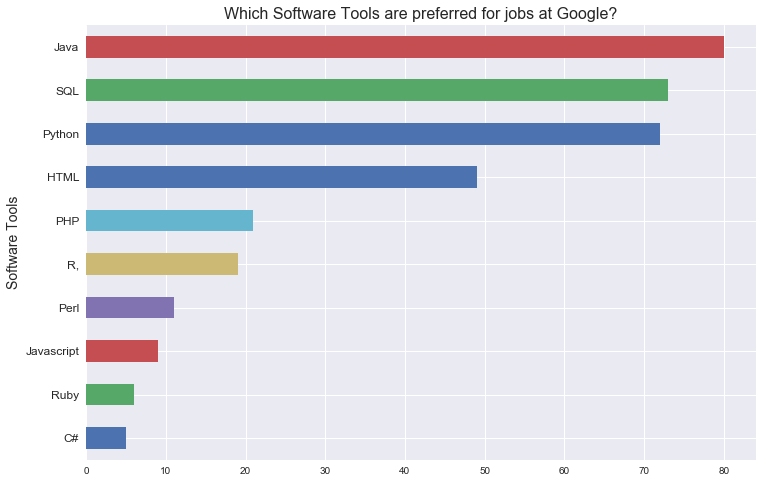

In [16]:
softwares = dict((x,0) for x in software)
for i in softwares:
    x = google['Preferred Qualifications'].str.contains(i).sum()
    if i in softwares:
        softwares[i] = x
        
software_sort = sorted(softwares.items(), key = lambda x: x[1], reverse = True)
software_df = pd.DataFrame(software_sort,columns=['Software', 'Frequency'])

software_df = software_df[::-1]

software_df.plot.barh(x = 'Software', y = 'Frequency', figsize=(12,8), legend = False)
plt.title("Which Software Tools are preferred for jobs at Google?", fontsize=16)
plt.xlabel("")
plt.ylabel("Software Tools", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* Looks like Java is still the most required skill but now SQL takes the second place for most preferable software skills to get hired at Google.
* Python and HTML skills are also common skills to be preferred for Google jobs.

We can also extract the requirement for the minimum years of job experiences to have.

**Note:** There are some rows that have no notes of the minimum years experience. I assumed them to have 0 years work experiences, so there may be a lot of 0 years present in the analysis.

In [17]:
google['Min_years_experience'] = google['Minimum Qualifications'].apply(lambda x : re.findall(r'([0-9]+) year',x))
google['Min_years_experience'] = google['Min_years_experience'].apply(lambda x : [0] if len(x)==0 else x)
google['Min_years_experience'] = google['Min_years_experience'].apply(lambda x : max(x))

**What are the minimum years of work experience required to land a job at Google?**

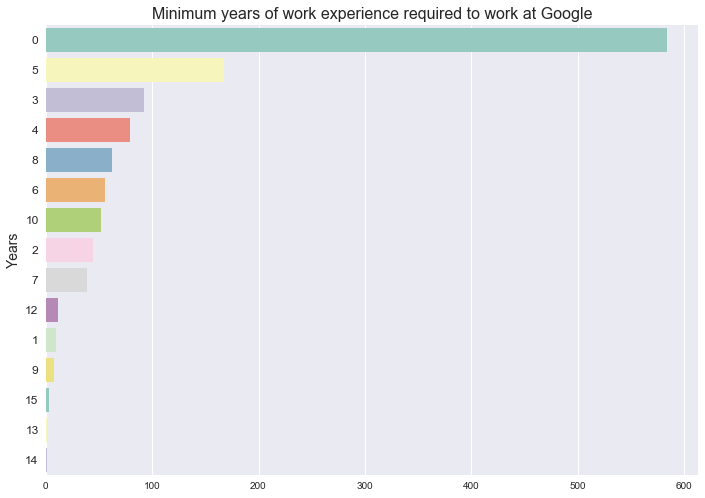

In [18]:
sns.countplot(y = "Min_years_experience", data = google, order = pd.value_counts(google['Min_years_experience']).index, palette="Set3")
plt.title("Minimum years of work experience required to work at Google", fontsize=16)
plt.xlabel("")
plt.ylabel("Years", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* 0 years experience is the most common requirement (probably due to the assumption) followed by 5 years requirement as second.

**We can also group the years to ranges for easier visualization:**

In [19]:
google['Min_years_experience'] = google.Min_years_experience.astype(int)

google.loc[(google.Min_years_experience >= 3) & (google.Min_years_experience <= 5), "Min_year_category"] = "3 - 5"
google.loc[(google.Min_years_experience >= 6) & (google.Min_years_experience <= 9), "Min_year_category"] = "6 - 9"
google.loc[google.Min_years_experience < 3, "Min_year_category"] = "0 - 2"
google.loc[google.Min_years_experience >= 10, "Min_year_category"] = "10+"

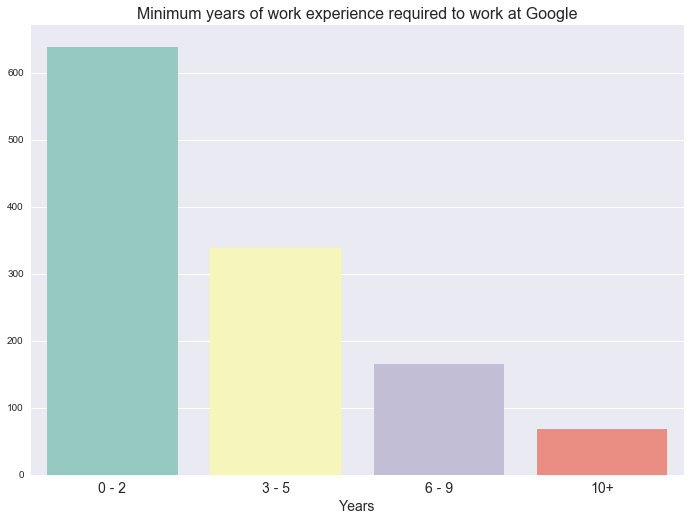

In [20]:
sns.countplot(x = "Min_year_category", data = google, order = pd.value_counts(google['Min_year_category']).index, palette="Set3")
plt.title("Minimum years of work experience required to work at Google", fontsize=16)
plt.ylabel("")
plt.xlabel("Years", fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

Now, we explore what are the most common words listed in the **Responsibilities** column. The most common words are the most on demand responsibilities for the jobs at Google.

We construct a Wordcloud to visualize the words with the most common words represented as the biggest font size.

**What responsibilities do we need to get a job at Google?**

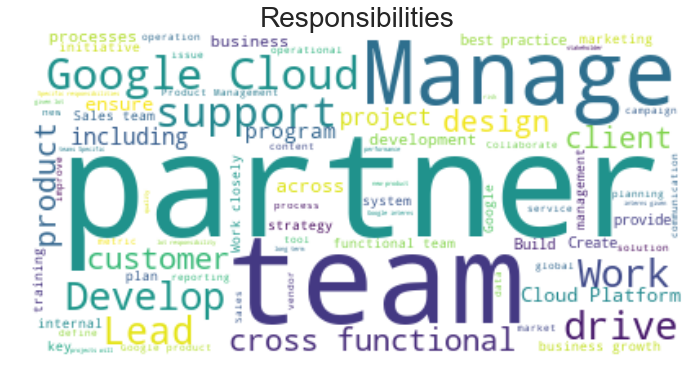

In [21]:
Responsibilities = ' '.join(google['Responsibilities'].tolist())

wc = WordCloud(background_color="white").generate(Responsibilities)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilities',size=28)
plt.show()

* We notice here that *Partner*, *team*, *Manage* are some of the words that are common.

* This means that some of the most common responsibilities to land a job at Google is to be able to work with others, teamwork and the ability to manage.


* ## Data or Analytics related job fields at Google

**Note:** As mentioned in the introduction, I also explore the Job Title at Google that are related to data and the analytics field. 

**Here we extract the Job Title that has *Analyst*, *Data* or *Machine Learning* on their name.**

In [22]:
data_jobs = google.loc[google.Title.str.contains("Analyst|Data|Machine Learning")]

**See the first few lines for data related Google jobs dataset:**

In [38]:
data_jobs.head(3)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country,Min_years_experience,Min_year_category
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"New York, NY, United States","Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects.","Bachelor’s degree in Business, Economics, Statistics, Operations Research or related analytical field, or equivalent practical experience.\n2 years of work experience in business analysis.\n1 year of experience with statistical modeling, forecasting or machine learning. Experience with R, SAS or Python.\n1 year of experience developing and manipulating large datasets.",Experience partnering or consulting cross-functionally with senior stakeholders.\nProficiency in a database query language (e.g. SQL).\nAbility to manage multiple projects in an ambiguous environment.\nStrong presentation and communication skills with the ability to communicate statistical concepts and explain recommendations to non-experts.,United States,2,0 - 2
10,Google,"Data Analyst, Consumer Hardware",Product & Customer Support,"Mountain View, CA, United States",Build and maintain the Support Operations Analytics infrastructure.\nCustomize and maintain tools to provide insights and visibility into key strategic and operational performance of the organization.\nDefine and action analysis on operational data sets to provide strategic recommendations to multiple levels of leadership; package analysis for reports and presentations to shape strategic and operational decisions.\nDraw insights from analyzing data to improve Support Operations quality and efficiency.\nContribute to strategic planning around product launches.,"BA/BS degree in Computer Science, Engineering, Economics, Business or a related degree, or equivalent practical experience.\n4 years of experience in an Analytical role such as Business Intelligence, Data Analytics, Statistical or Consulting.\n4 years of experience with SQL or visualization tools such as Tableau.","Experience in designing and executing structured analysis, deriving business insights, and evaluating the impact of business decisions.\nExperience working with and developing for non-technical users (defining requirements, explaining technical concepts to non-technical business users, etc).\nExperience with scripting languages and business intelligence tools.\nDemonstrated ability to analyze complex data-sets in a fast-paced environment, with the ability to work strategically and objectively.\nAbility to deal with and prioritize multiple priorities while driving towards pragmatic decisions.\nExcellent oral and written communication skills, with the ability to communicate findings in a structured and clear manner to a non-technical audience.",United States,4,3 - 5
16,Google,"Machine Learning Product Specialist, Google Cloud (EMEA)",Technical Solutions,"Frankfurt, Germany","Work as part of the Sales team to identify and qualify Platform opportunities and determine if Google Cloud Platform is right for them. Identify business and technical requirements, conduct full technical discovery and architect client solutions to meet gathered requirements.\nTake responsibility for leading the technical project, including such activities as technology advocacy, supporting bid responses, product and solution briefings, proof-of-concept work, and the coordination of supporting technical resources.\nWork hands-on with Google Cloud Platform products to demonstrate and prototype integrations in customer/partner environments. Travel frequently around EMEA for meetings, technical reviews and onsite delivery activities.\nPrepare and deliver product messaging in an effort to highlight Google Cl

**What are the most on demand Data related Job Title at Google?**

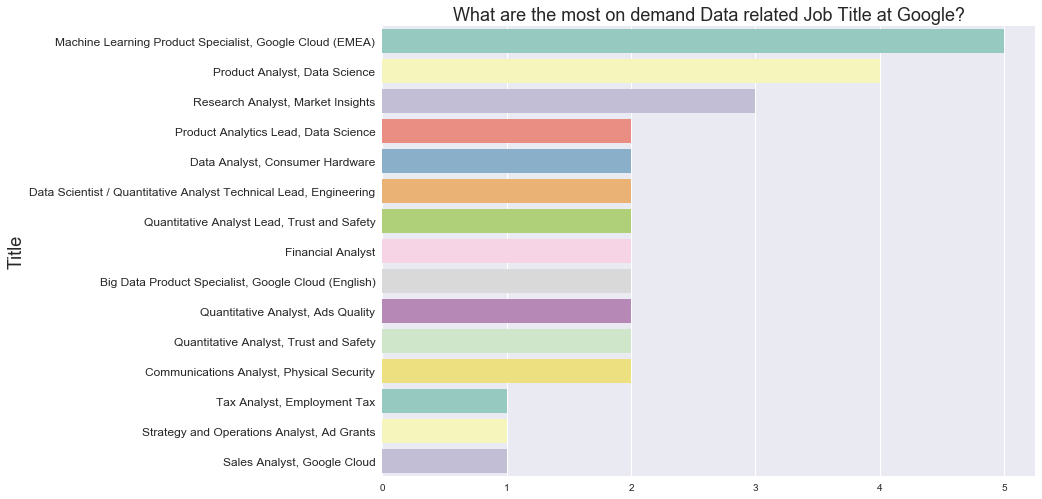

In [24]:
sns.countplot(y = "Title", data = data_jobs, order = pd.value_counts(data_jobs['Title']).iloc[:15].index, palette = "Set3")
plt.title("What are the most on demand Data related Job Title at Google?", fontsize=18)
plt.xlabel("")
plt.ylabel("Title", fontsize = 18)
plt.yticks(fontsize = 12)
plt.show()

* For Data related Jobs, it looks like Google is highly looking for Machine Learning Product Specialist and Data Science product analyst.

**What are the most on demand Data related Job Category at Google?**

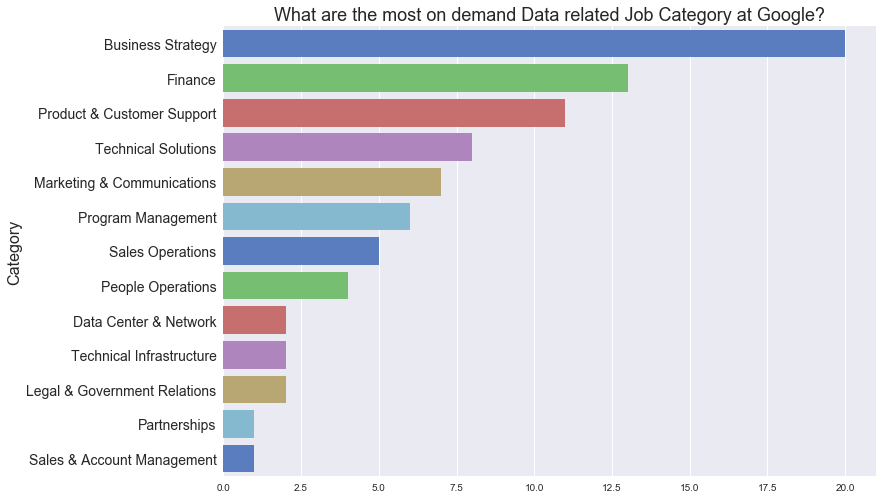

In [25]:
sns.countplot(y = "Category", data = data_jobs, order = pd.value_counts(data_jobs['Category']).iloc[:15].index, palette = "muted")
plt.title("What are the most on demand Data related Job Category at Google?", fontsize=18)
plt.xlabel("")
plt.ylabel("Category", fontsize = 16)
plt.yticks(fontsize = 14)
plt.show()

* For data related jobs, Business strategy and Finance are the most on demand job categories at Google.

**What are the most common countries for Data related Google Jobs?**

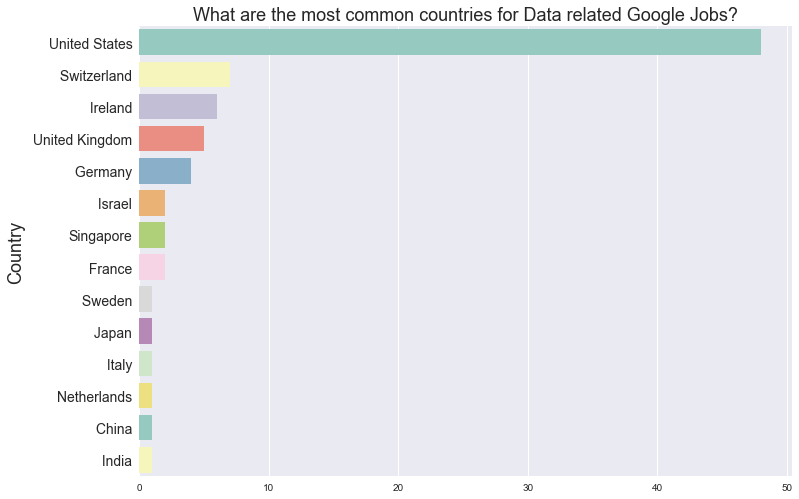

In [26]:
sns.countplot(y = "Country", data = data_jobs, order = pd.value_counts(data_jobs['Country']).iloc[:15].index, palette = "Set3")
plt.title("What are the most common countries for Data related Google Jobs?", fontsize=18)
plt.xlabel("")
plt.ylabel("Country", fontsize = 18)
plt.yticks(fontsize = 14)
plt.show()

* The Google Companies in the United States are the most in need to hire new employees for data related jobs.

**Which Academic Degrees are required for Data related jobs at Google?**

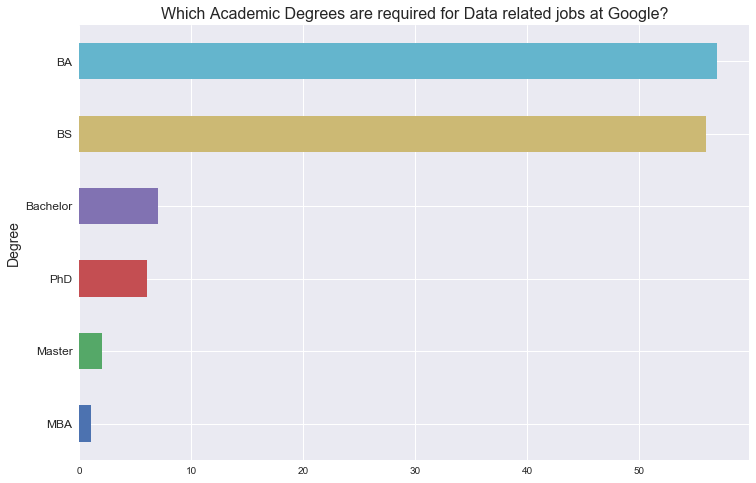

In [27]:
degrees = dict((x,0) for x in degree)
for i in degrees:
    x = data_jobs['Minimum Qualifications'].str.contains(i).sum()
    if i in degrees:
        degrees[i] = x
        
degree_sort = sorted(degrees.items(), key = lambda x: x[1], reverse = True)
degree_df = pd.DataFrame(degree_sort,columns=['Degree', 'Frequency']) 

degree_df = degree_df[::-1]

degree_df.plot.barh(x = 'Degree', y = 'Frequency', figsize=(12,8), legend = False)
plt.title("Which Academic Degrees are required for Data related jobs at Google?", fontsize=16)
plt.xlabel("")
plt.ylabel("Degree", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* Looks like BA or BS academic degree is also the minimum requirement to get a data related jobs at Google.

**Which Academic Degrees are preferred for Data related jobs at Google?**

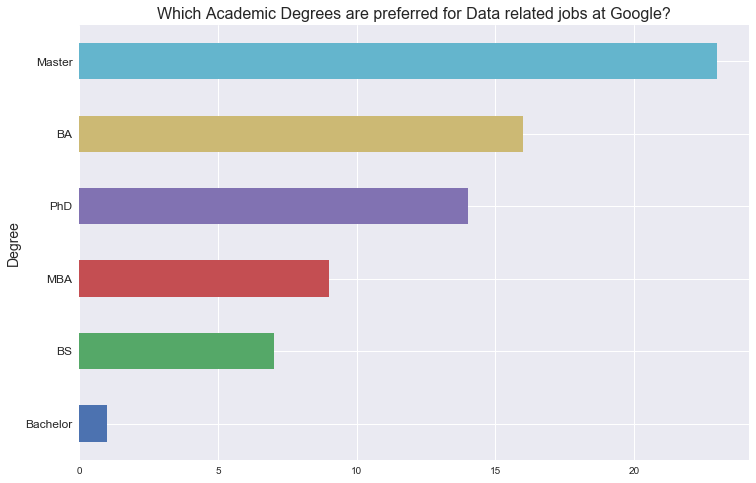

In [28]:
degrees = dict((x,0) for x in degree)
for i in degrees:
    x = data_jobs['Preferred Qualifications'].str.contains(i).sum()
    if i in degrees:
        degrees[i] = x
        
degree_sort = sorted(degrees.items(), key = lambda x: x[1], reverse = True)
degree_df = pd.DataFrame(degree_sort,columns=['Degree', 'Frequency'])

degree_df = degree_df[::-1]

degree_df.plot.barh(x = 'Degree', y = 'Frequency', figsize=(12,8), legend = False)
plt.title("Which Academic Degrees are preferred for Data related jobs at Google?", fontsize=16)
plt.xlabel("")
plt.ylabel("Degree", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* If you have a Master's degree, you are more preferable to land a data related jobs at Google.

**Which Software Tools are required for Data related jobs at Google?**

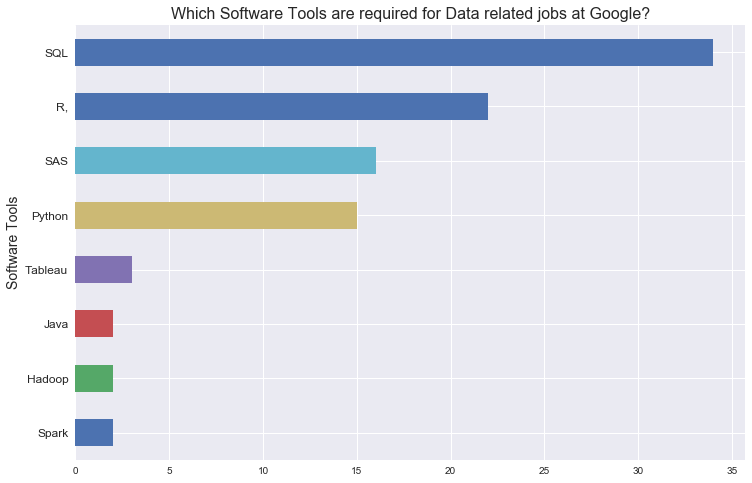

In [29]:
data_software = ['Python', 'Java', 'R,','Hadoop','SQL','Spark','Tableau','SAS']

softwares = dict((x,0) for x in data_software)
for i in softwares:
    x = data_jobs['Minimum Qualifications'].str.contains(i).sum()
    if i in softwares:
        softwares[i] = x
        
software_sort = sorted(softwares.items(), key = lambda x: x[1], reverse = True)
software_df = pd.DataFrame(software_sort,columns=['Software', 'Frequency'])

software_df = software_df[::-1]

software_df.plot.barh(x = 'Software', y = 'Frequency', figsize=(12,8), legend = False)
plt.title("Which Software Tools are required for Data related jobs at Google?", fontsize=16)
plt.xlabel("")
plt.ylabel("Software Tools", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* For data related jobs, SQL and R take the top places as the most required skills to get hired at Google.
* SAS and Python skills are also quite common.

**Which Software Tools are preferred for Data related jobs at Google?**

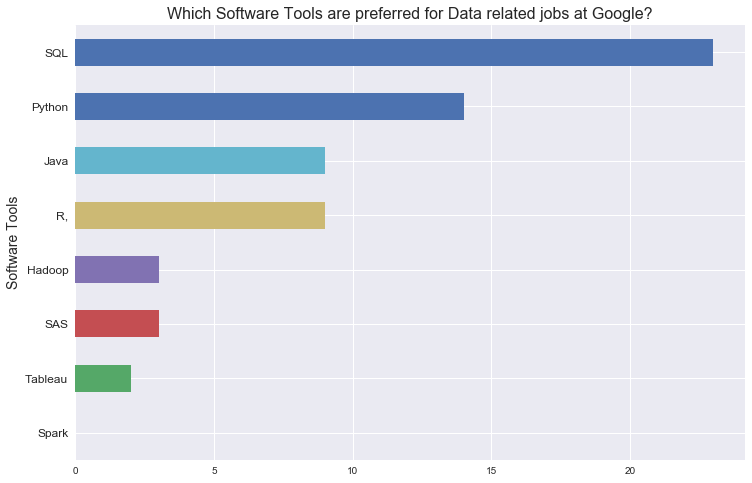

In [30]:
softwares = dict((x,0) for x in data_software)
for i in softwares:
    x = data_jobs['Preferred Qualifications'].str.contains(i).sum()
    if i in softwares:
        softwares[i] = x
        
software_sort = sorted(softwares.items(), key = lambda x: x[1], reverse = True)
software_df = pd.DataFrame(software_sort,columns=['Software', 'Frequency'])

software_df = software_df[::-1]

software_df.plot.barh(x = 'Software', y = 'Frequency', figsize=(12,8), legend = False)
plt.title("Which Software Tools are preferred for Data related jobs at Google?", fontsize=16)
plt.xlabel("")
plt.ylabel("Software Tools", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* Again for data related jobs, SQL is still the most preferred skill to have to be hired. 
* However, Python is now more preferable to have than R skill.
* Equal preferance now for Java and R skills to be hired.

**Which Field of Studies are required for Data Related Jobs at Google?**

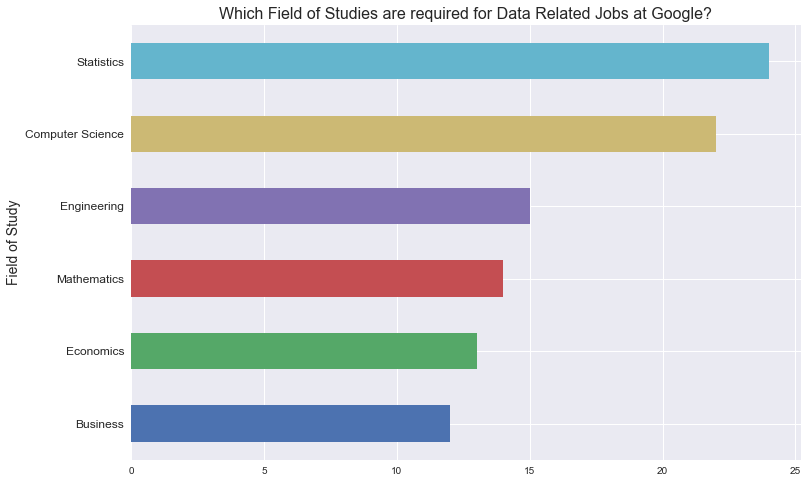

In [31]:
degree_field = ['Mathematics', 'Statistics', 'Economics','Business','Engineering','Computer Science']

fields = dict((x,0) for x in degree_field)
for i in fields:
    x = data_jobs['Minimum Qualifications'].str.contains(i).sum()
    if i in fields:
        fields[i] = x
        
field_sort = sorted(fields.items(), key = lambda x: x[1], reverse = True)
field_df = pd.DataFrame(field_sort,columns=['Field', 'Frequency'])
field_df

field_df = field_df[::-1]

field_df.plot.barh(x = 'Field', y = 'Frequency', figsize=(12,8), legend = False)
plt.title("Which Field of Studies are required for Data Related Jobs at Google?", fontsize=16)
plt.xlabel("")
plt.ylabel("Field of Study", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* For data related jobs, a field study in Statistics or Computer Science are the most top requirement to land a job at Google.

**Which Field of Studies are preferred for Data Related Jobs at Google?**

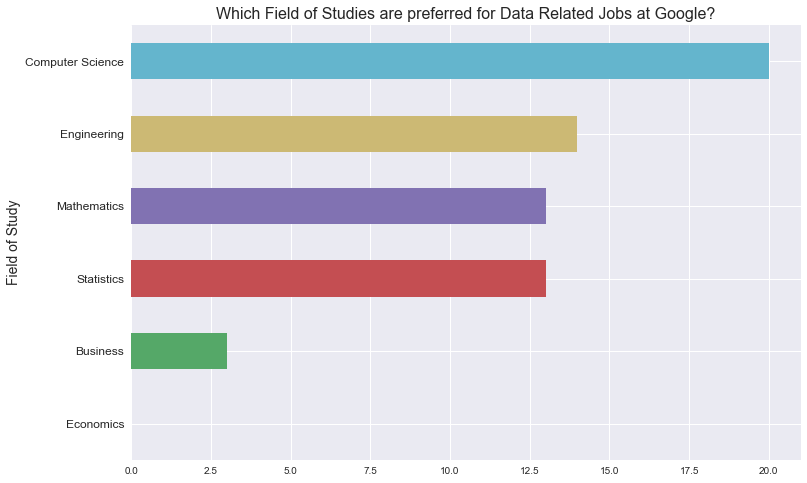

In [32]:
fields = dict((x,0) for x in degree_field)
for i in fields:
    x = data_jobs['Preferred Qualifications'].str.contains(i).sum()
    if i in fields:
        fields[i] = x
        
field_sort = sorted(fields.items(), key = lambda x: x[1], reverse = True)
field_df = pd.DataFrame(field_sort,columns=['Field', 'Frequency'])
field_df

field_df = field_df[::-1]

field_df.plot.barh(x = 'Field', y = 'Frequency', figsize=(12,8), legend = False)
plt.title("Which Field of Studies are preferred for Data Related Jobs at Google?", fontsize=16)
plt.xlabel("")
plt.ylabel("Field of Study", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* A degree field in Computer Science is the most preferable in landing a data related jobs at Google. 
* A degree field in Engineering, Mathematics and Statistics follows closely after.
* Economics field is required but not preferable.

**What are the minimum years of work experience required to work in a Data related Jobs at Google?**

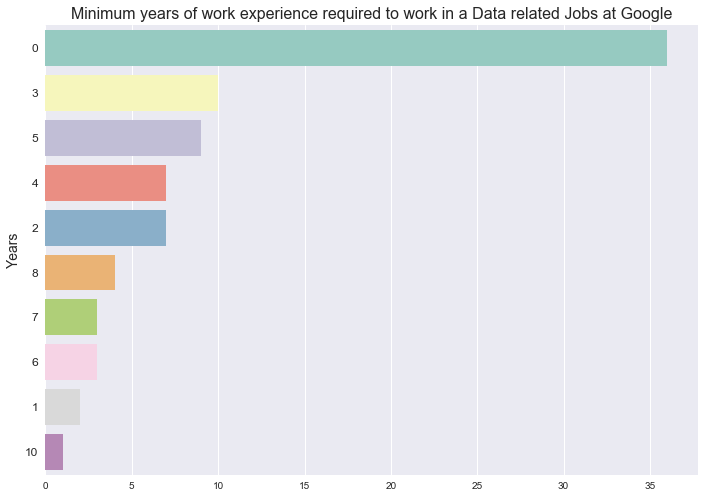

In [34]:
sns.countplot(y = "Min_years_experience", data = data_jobs, order = pd.value_counts(data_jobs['Min_years_experience']).index, palette="Set3")
plt.title("Minimum years of work experience required to work in a Data related Jobs at Google", fontsize=16)
plt.xlabel("")
plt.ylabel("Years", fontsize = 14)
plt.yticks(fontsize = 12)
plt.show()

* As expected, 0 years of work experience still dominates the analysis due to the assumption (no years listed are assumed to be 0 years). 
* But now, 3 years of work experience is more common to be hired for data related Google jobs.

**Group the years as before:**

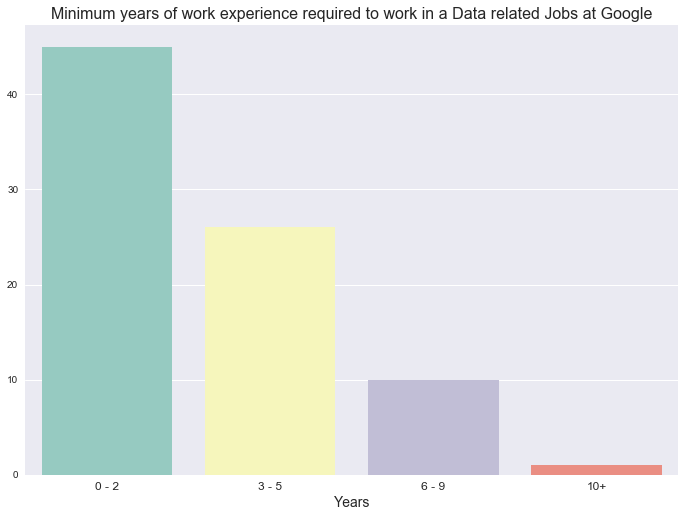

In [35]:
sns.countplot(x = "Min_year_category", data = data_jobs, order = pd.value_counts(data_jobs['Min_year_category']).index, palette="Set3")
plt.title("Minimum years of work experience required to work in a Data related Jobs at Google", fontsize=16)
plt.ylabel("")
plt.xlabel("Years", fontsize = 14)
plt.xticks(fontsize = 12)
plt.show()

**What responsibilities do we need to get a data related job at Google?**

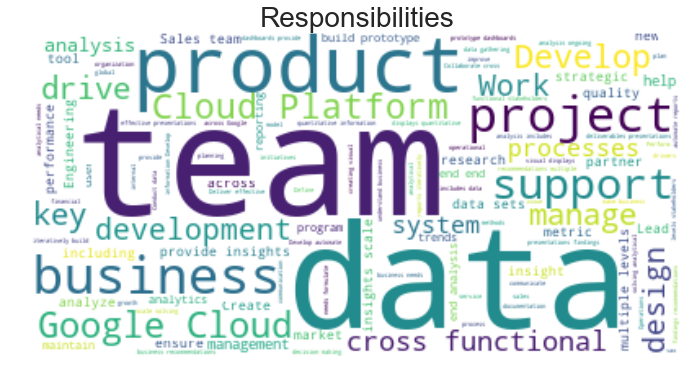

In [36]:
Responsibilities = ' '.join(data_jobs['Responsibilities'].tolist())

wc = WordCloud(background_color="white").generate(Responsibilities)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilities',size=28)
plt.show()

* Here we notice that *data*, *team*, *project* are some of the most common responsibilities that are listed.

* This means that the ability to work with data, work with projects and work as a team are common responsibilities to have for data related jobs at Google.